In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.9 MB 1.2 MB/s 


In [3]:
import numpy as np
import os.path
import matplotlib.pyplot as plt
import pandas as pd
import rasterio
from rasterio.plot import show
from scipy.spatial import distance

In [4]:
# 전체 이미지 불러오기
! gdown --id 1ITvjvPpUa0qmu_m4Oj_Dymb59F5hSAls
pic_total = "knn_pic.PNG"

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ITvjvPpUa0qmu_m4Oj_Dymb59F5hSAls
To: /content/knn_pic.PNG
100% 200k/200k [00:00<00:00, 86.1MB/s]


In [5]:
os.path.isfile(pic_total)

True

In [6]:
Total_img = rasterio.open(pic_total)

/usr/local/lib/python3.8/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


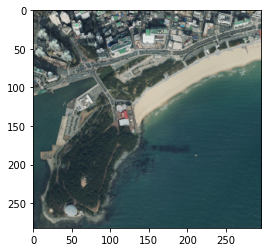

In [7]:
show(Total_img)

In [8]:
type(Total_img)

rasterio.io.DatasetReader

In [9]:
I_total = Total_img.read()

In [10]:
I_total.shape

(4, 282, 296)

In [11]:
type(I_total)

numpy.ndarray

In [12]:
I_total = np.swapaxes(I_total, 0, 2)

In [13]:
I_total.shape

(296, 282, 4)

In [14]:
X_total = I_total.reshape((282*296, 4))

In [15]:
X_total.shape

(83472, 4)

In [16]:
# 전체 이미지 픽셀값 추출
import PIL.Image as pilimg

In [17]:
im = pilimg.open( pic_total )

In [18]:
pix_total = np.array(im)

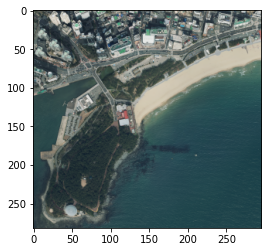

In [19]:
plt.imshow(pix_total)

In [20]:
pix_total

array([[[ 91,  95,  82, 255],
        [106, 104,  92, 255],
        [ 73,  80,  75, 255],
        ...,
        [214, 211, 204, 255],
        [218, 216, 211, 255],
        [214, 215, 212, 255]],

       [[115, 118, 104, 255],
        [ 74,  81,  71, 255],
        [ 37,  51,  51, 255],
        ...,
        [215, 212, 205, 255],
        [187, 191, 188, 255],
        [171, 176, 173, 255]],

       [[142, 141, 131, 255],
        [119, 122, 113, 255],
        [ 91,  96,  87, 255],
        ...,
        [195, 196, 191, 255],
        [163, 170, 169, 255],
        [151, 157, 154, 255]],

       ...,

       [[ 41,  58,  66, 255],
        [ 41,  58,  66, 255],
        [ 36,  52,  61, 255],
        ...,
        [ 30,  66,  73, 255],
        [ 30,  68,  74, 255],
        [ 27,  65,  72, 255]],

       [[ 43,  61,  67, 255],
        [ 40,  58,  65, 255],
        [ 36,  52,  61, 255],
        ...,
        [ 38,  74,  79, 255],
        [ 40,  75,  80, 255],
        [ 39,  75,  80, 255]],

       [[ 41

In [21]:
pix_total = np.reshape(pix_total, (296*282, -2))

In [22]:
pix_total

array([[ 91,  95,  82, 255],
       [106, 104,  92, 255],
       [ 73,  80,  75, 255],
       ...,
       [ 38,  74,  79, 255],
       [ 33,  68,  75, 255],
       [ 34,  70,  76, 255]], dtype=uint8)

In [23]:
pix_total = np.array(pix_total)

In [24]:
df_total = pd.DataFrame(pix_total)

In [25]:
df_total

,0,1,2,3
0,91,95,82,255
1,106,104,92,255
2,73,80,75,255
3,68,78,70,255
4,62,73,69,255
...,...,...,...,...
83467,48,83,86,255
83468,36,71,76,255
83469,38,74,79,255
83470,33,68,75,255


In [26]:
df_total = df_total.drop(df_total.columns[3],axis=1)

In [27]:
df_total

,0,1,2
0,91,95,82
1,106,104,92
2,73,80,75
3,68,78,70
4,62,73,69
...,...,...,...
83467,48,83,86
83468,36,71,76
83469,38,74,79
83470,33,68,75


In [28]:
df_total.columns=["R","G","B"]

In [29]:
df_total

,R,G,B
0,91,95,82
1,106,104,92
2,73,80,75
3,68,78,70
4,62,73,69
...,...,...,...
83467,48,83,86
83468,36,71,76
83469,38,74,79
83470,33,68,75


In [30]:
# Water 픽셀값 추출후 class를 water로 설정(100개)
! gdown --id 1Il8wXClud-0y7yNSx-8F5GDXG8x9WzRS
pic_water = "Water.png"

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Il8wXClud-0y7yNSx-8F5GDXG8x9WzRS
To: /content/Water.png
100% 317/317 [00:00<00:00, 891kB/s]


In [31]:
im_water = pilimg.open( pic_water )

In [32]:
pix_water = np.array(im_water)

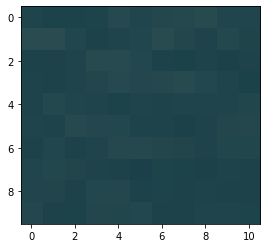

In [33]:
plt.imshow(pix_water)

In [34]:
pix_water

array([[[30, 69, 75],
        [28, 66, 74],
        [28, 66, 74],
        [30, 68, 75],
        [37, 73, 79],
        [32, 69, 76],
        [35, 71, 77],
        [36, 72, 78],
        [39, 74, 79],
        [33, 69, 76],
        [32, 69, 76]],

       [[41, 76, 81],
        [42, 76, 81],
        [33, 70, 77],
        [30, 66, 74],
        [32, 68, 75],
        [34, 70, 77],
        [40, 75, 80],
        [35, 70, 77],
        [30, 67, 75],
        [35, 72, 78],
        [31, 68, 74]],

       [[28, 66, 74],
        [29, 66, 74],
        [32, 68, 75],
        [39, 74, 79],
        [38, 74, 80],
        [34, 71, 78],
        [29, 66, 74],
        [27, 65, 73],
        [30, 67, 75],
        [29, 65, 73],
        [31, 67, 75]],

       [[30, 68, 75],
        [29, 66, 74],
        [31, 68, 75],
        [34, 70, 76],
        [38, 73, 79],
        [35, 71, 77],
        [36, 72, 78],
        [39, 74, 79],
        [35, 71, 78],
        [32, 68, 76],
        [28, 66, 73]],

       [[30, 67, 74],
  

In [35]:
pix_water = np.reshape(pix_water, (10*11, -1))

In [36]:
pix_water

array([[30, 69, 75],
       [28, 66, 74],
       [28, 66, 74],
       [30, 68, 75],
       [37, 73, 79],
       [32, 69, 76],
       [35, 71, 77],
       [36, 72, 78],
       [39, 74, 79],
       [33, 69, 76],
       [32, 69, 76],
       [41, 76, 81],
       [42, 76, 81],
       [33, 70, 77],
       [30, 66, 74],
       [32, 68, 75],
       [34, 70, 77],
       [40, 75, 80],
       [35, 70, 77],
       [30, 67, 75],
       [35, 72, 78],
       [31, 68, 74],
       [28, 66, 74],
       [29, 66, 74],
       [32, 68, 75],
       [39, 74, 79],
       [38, 74, 80],
       [34, 71, 78],
       [29, 66, 74],
       [27, 65, 73],
       [30, 67, 75],
       [29, 65, 73],
       [31, 67, 75],
       [30, 68, 75],
       [29, 66, 74],
       [31, 68, 75],
       [34, 70, 76],
       [38, 73, 79],
       [35, 71, 77],
       [36, 72, 78],
       [39, 74, 79],
       [35, 71, 78],
       [32, 68, 76],
       [28, 66, 73],
       [30, 67, 74],
       [35, 72, 78],
       [33, 69, 76],
       [32, 6

In [37]:
pix_water = np.array(pix_water)

In [38]:
df_water = pd.DataFrame(pix_water)

In [39]:
df_water

,0,1,2
0,30,69,75
1,28,66,74
2,28,66,74
3,30,68,75
4,37,73,79
...,...,...,...
105,29,66,73
106,29,66,74
107,31,68,75
108,32,68,75


In [40]:
df_water.columns=["R","G","B"]

In [41]:
df_water

,R,G,B
0,30,69,75
1,28,66,74
2,28,66,74
3,30,68,75
4,37,73,79
...,...,...,...
105,29,66,73
106,29,66,74
107,31,68,75
108,32,68,75


In [42]:
# water=0
df_water['Class']='0'
df_water.head(110)

,R,G,B,Class
0,30,69,75,0
1,28,66,74,0
2,28,66,74,0
3,30,68,75,0
4,37,73,79,0
...,...,...,...,...
105,29,66,73,0
106,29,66,74,0
107,31,68,75,0
108,32,68,75,0


In [43]:
df_water=df_water.drop([df_water.index[100]])

In [44]:
df_water

,R,G,B,Class
0,30,69,75,0
1,28,66,74,0
2,28,66,74,0
3,30,68,75,0
4,37,73,79,0
...,...,...,...,...
105,29,66,73,0
106,29,66,74,0
107,31,68,75,0
108,32,68,75,0


In [45]:
df_water=df_water.drop([df_water.index[100], df_water.index[101], df_water.index[102], df_water.index[103], df_water.index[104], df_water.index[105]])

In [46]:
df_water

,R,G,B,Class
0,30,69,75,0
1,28,66,74,0
2,28,66,74,0
3,30,68,75,0
4,37,73,79,0
...,...,...,...,...
98,29,66,74,0
99,35,71,77,0
107,31,68,75,0
108,32,68,75,0


In [47]:
df_water=df_water.drop([df_water.index[100], df_water.index[101], df_water.index[102]])

In [48]:
df_water

,R,G,B,Class
0,30,69,75,0
1,28,66,74,0
2,28,66,74,0
3,30,68,75,0
4,37,73,79,0
...,...,...,...,...
95,29,66,74,0
96,30,67,74,0
97,29,66,74,0
98,29,66,74,0


In [49]:
water_train=df_water.to_numpy()

In [50]:
water_train

array([[30, 69, 75, '0'],
       [28, 66, 74, '0'],
       [28, 66, 74, '0'],
       [30, 68, 75, '0'],
       [37, 73, 79, '0'],
       [32, 69, 76, '0'],
       [35, 71, 77, '0'],
       [36, 72, 78, '0'],
       [39, 74, 79, '0'],
       [33, 69, 76, '0'],
       [32, 69, 76, '0'],
       [41, 76, 81, '0'],
       [42, 76, 81, '0'],
       [33, 70, 77, '0'],
       [30, 66, 74, '0'],
       [32, 68, 75, '0'],
       [34, 70, 77, '0'],
       [40, 75, 80, '0'],
       [35, 70, 77, '0'],
       [30, 67, 75, '0'],
       [35, 72, 78, '0'],
       [31, 68, 74, '0'],
       [28, 66, 74, '0'],
       [29, 66, 74, '0'],
       [32, 68, 75, '0'],
       [39, 74, 79, '0'],
       [38, 74, 80, '0'],
       [34, 71, 78, '0'],
       [29, 66, 74, '0'],
       [27, 65, 73, '0'],
       [30, 67, 75, '0'],
       [29, 65, 73, '0'],
       [31, 67, 75, '0'],
       [30, 68, 75, '0'],
       [29, 66, 74, '0'],
       [31, 68, 75, '0'],
       [34, 70, 76, '0'],
       [38, 73, 79, '0'],
       [35, 

In [51]:
# Tree 픽셀값 추출후 class를 Tree로 설정(100개)
! gdown --id 1IJis5mkE1_b2uiiAgrdBx206czfSNfQc
pic_tree = "Tree.png"

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1IJis5mkE1_b2uiiAgrdBx206czfSNfQc
To: /content/Tree.png
100% 372/372 [00:00<00:00, 1.02MB/s]


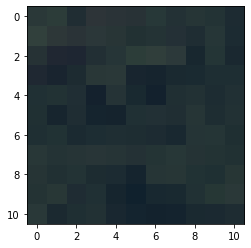

In [52]:
im_tree = pilimg.open( pic_tree )
pix_tree = np.array(im_tree)
plt.imshow(pix_tree)

In [53]:
pix_tree = np.reshape(pix_tree, (11*11, -1))

In [54]:
pix_tree = np.array(pix_tree)
df_tree = pd.DataFrame(pix_tree)
df_tree.columns=["R","G","B"]
df_tree

,R,G,B
0,42,56,56
1,44,60,57
2,32,45,51
3,45,52,56
4,42,51,55
...,...,...,...
116,19,34,45
117,20,35,46
118,26,41,48
119,27,41,49


In [55]:
# tree=1
df_tree['Class']='1'
df_tree.head(121)

,R,G,B,Class
0,42,56,56,1
1,44,60,57,1
2,32,45,51,1
3,45,52,56,1
4,42,51,55,1
...,...,...,...,...
116,19,34,45,1
117,20,35,46,1
118,26,41,48,1
119,27,41,49,1


In [56]:
df_tree

,R,G,B,Class
0,42,56,56,1
1,44,60,57,1
2,32,45,51,1
3,45,52,56,1
4,42,51,55,1
...,...,...,...,...
116,19,34,45,1
117,20,35,46,1
118,26,41,48,1
119,27,41,49,1


In [57]:
df_tree=df_tree.drop([df_tree.index[100], df_tree.index[101], df_tree.index[102], df_tree.index[103], df_tree.index[104], df_tree.index[106]])

In [58]:
df_tree

,R,G,B,Class
0,42,56,56,1
1,44,60,57,1
2,32,45,51,1
3,45,52,56,1
4,42,51,55,1
...,...,...,...,...
116,19,34,45,1
117,20,35,46,1
118,26,41,48,1
119,27,41,49,1


In [59]:
df_tree=df_tree.drop([df_tree.index[100], df_tree.index[101], df_tree.index[102], df_tree.index[103], df_tree.index[104], df_tree.index[106], df_tree.index[107], df_tree.index[108], df_tree.index[109], df_tree.index[110]])

In [60]:
df_tree

,R,G,B,Class
0,42,56,56,1
1,44,60,57,1
2,32,45,51,1
3,45,52,56,1
4,42,51,55,1
...,...,...,...,...
111,27,41,48,1
117,20,35,46,1
118,26,41,48,1
119,27,41,49,1


In [61]:
df_tree=df_tree.drop([df_tree.index[100], df_tree.index[101], df_tree.index[102], df_tree.index[103], df_tree.index[104]])

In [62]:
df_tree

,R,G,B,Class
0,42,56,56,1
1,44,60,57,1
2,32,45,51,1
3,45,52,56,1
4,42,51,55,1
...,...,...,...,...
95,39,54,54,1
96,33,50,52,1
97,31,48,51,1
98,39,54,53,1


In [63]:
tree_train=df_tree.to_numpy()
tree_train

array([[42, 56, 56, '1'],
       [44, 60, 57, '1'],
       [32, 45, 51, '1'],
       [45, 52, 56, '1'],
       [42, 51, 55, '1'],
       [40, 50, 54, '1'],
       [39, 56, 56, '1'],
       [35, 49, 53, '1'],
       [38, 53, 54, '1'],
       [35, 51, 53, '1'],
       [29, 43, 50, '1'],
       [49, 64, 60, '1'],
       [45, 55, 56, '1'],
       [42, 51, 55, '1'],
       [43, 55, 57, '1'],
       [40, 53, 54, '1'],
       [34, 49, 51, '1'],
       [36, 51, 53, '1'],
       [36, 48, 54, '1'],
       [31, 45, 51, '1'],
       [38, 54, 55, '1'],
       [28, 43, 50, '1'],
       [38, 50, 53, '1'],
       [32, 39, 50, '1'],
       [30, 38, 50, '1'],
       [34, 47, 52, '1'],
       [38, 53, 55, '1'],
       [44, 61, 57, '1'],
       [48, 62, 59, '1'],
       [44, 57, 58, '1'],
       [24, 39, 47, '1'],
       [36, 53, 54, '1'],
       [26, 40, 48, '1'],
       [31, 40, 50, '1'],
       [25, 36, 47, '1'],
       [29, 43, 49, '1'],
       [41, 55, 55, '1'],
       [42, 56, 56, '1'],
       [24, 

In [64]:
# Artificial Structure 픽셀값 추출후 class를 arificial structure로 설정(100개)
! gdown --id 1-qFkq-eD-VTqhu_Dbp20gRzbYobLPEBk
pic_as = "Artificial Structure.png"

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-qFkq-eD-VTqhu_Dbp20gRzbYobLPEBk
To: /content/Artificial Structure.png
100% 414/414 [00:00<00:00, 1.17MB/s]


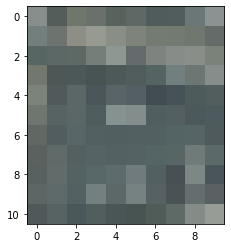

In [65]:
im_as = pilimg.open( pic_as )
pix_as = np.array(im_as)
plt.imshow(pix_as)

In [66]:
pix_as = np.reshape(pix_as, (10*11, -1))

In [67]:
pix_as = np.array(pix_as)
df_as = pd.DataFrame(pix_as)
df_as.columns=["R","G","B"]
df_as

,R,G,B
0,136,142,139
1,84,93,90
2,111,118,108
3,106,113,106
4,89,99,94
...,...,...,...
105,72,84,82
106,80,92,88
107,95,105,101
108,133,139,134


In [68]:
# artificial structure = 2
df_as['Class']='2'
df_as.head(110)

,R,G,B,Class
0,136,142,139,2
1,84,93,90,2
2,111,118,108,2
3,106,113,106,2
4,89,99,94,2
...,...,...,...,...
105,72,84,82,2
106,80,92,88,2
107,95,105,101,2
108,133,139,134,2


In [69]:
df_as

,R,G,B,Class
0,136,142,139,2
1,84,93,90,2
2,111,118,108,2
3,106,113,106,2
4,89,99,94,2
...,...,...,...,...
105,72,84,82,2
106,80,92,88,2
107,95,105,101,2
108,133,139,134,2


In [70]:
df_as=df_as.drop([df_as.index[100], df_as.index[101], df_as.index[102], df_as.index[103], df_as.index[104]])

In [71]:
df_as

,R,G,B,Class
0,136,142,139,2
1,84,93,90,2
2,111,118,108,2
3,106,113,106,2
4,89,99,94,2
...,...,...,...,...
105,72,84,82,2
106,80,92,88,2
107,95,105,101,2
108,133,139,134,2


In [72]:
df_as=df_as.drop([df_as.index[100], df_as.index[101], df_as.index[102], df_as.index[103], df_as.index[104]])

In [73]:
df_as

,R,G,B,Class
0,136,142,139,2
1,84,93,90,2
2,111,118,108,2
3,106,113,106,2
4,89,99,94,2
...,...,...,...,...
95,118,129,129,2
96,87,96,98,2
97,73,83,85,2
98,101,110,111,2


In [74]:
as_train=df_as.to_numpy()
as_train

array([[136, 142, 139, '2'],
       [84, 93, 90, '2'],
       [111, 118, 108, '2'],
       [106, 113, 106, '2'],
       [89, 99, 94, '2'],
       [94, 105, 101, '2'],
       [80, 91, 91, '2'],
       [81, 92, 93, '2'],
       [107, 118, 118, '2'],
       [138, 146, 146, '2'],
       [115, 127, 124, '2'],
       [109, 116, 112, '2'],
       [141, 143, 135, '2'],
       [151, 154, 145, '2'],
       [137, 142, 134, '2'],
       [126, 132, 124, '2'],
       [115, 123, 114, '2'],
       [114, 122, 114, '2'],
       [112, 119, 110, '2'],
       [99, 108, 104, '2'],
       [88, 102, 99, '2'],
       [91, 104, 102, '2'],
       [94, 105, 102, '2'],
       [118, 126, 121, '2'],
       [142, 151, 145, '2'],
       [99, 107, 108, '2'],
       [126, 131, 128, '2'],
       [134, 140, 135, '2'],
       [137, 143, 136, '2'],
       [123, 130, 122, '2'],
       [115, 120, 111, '2'],
       [79, 86, 86, '2'],
       [75, 87, 88, '2'],
       [72, 83, 84, '2'],
       [77, 89, 89, '2'],
       [81, 93, 

In [75]:
np_A=np.concatenate((water_train,tree_train,as_train),axis=0)

In [76]:
np_A

array([[30, 69, 75, '0'],
       [28, 66, 74, '0'],
       [28, 66, 74, '0'],
       ...,
       [73, 83, 85, '2'],
       [101, 110, 111, '2'],
       [88, 98, 98, '2']], dtype=object)

In [77]:
df_A = pd.DataFrame(np_A)
df_A

,0,1,2,3
0,30,69,75,0
1,28,66,74,0
2,28,66,74,0
3,30,68,75,0
4,37,73,79,0
...,...,...,...,...
295,118,129,129,2
296,87,96,98,2
297,73,83,85,2
298,101,110,111,2


In [78]:
df_A.columns=["R","G","B","Class"]
df_A

,R,G,B,Class
0,30,69,75,0
1,28,66,74,0
2,28,66,74,0
3,30,68,75,0
4,37,73,79,0
...,...,...,...,...
295,118,129,129,2
296,87,96,98,2
297,73,83,85,2
298,101,110,111,2


In [79]:
X=df_A[['R','G','B']]
X

,R,G,B
0,30,69,75
1,28,66,74
2,28,66,74
3,30,68,75
4,37,73,79
...,...,...,...
295,118,129,129
296,87,96,98
297,73,83,85
298,101,110,111


In [80]:
X_random=df_total.sample(n=30,replace=False,random_state=500)
X_random

,R,G,B
54710,34,68,79
19677,163,158,147
55166,51,65,61
43226,43,74,75
25376,204,196,178
67448,29,67,74
37311,46,74,74
8578,122,111,106
55622,30,67,76
39862,50,84,87


In [81]:
X_random['Class']='0'
X_random.head(30)

,R,G,B,Class
54710,34,68,79,0
19677,163,158,147,0
55166,51,65,61,0
43226,43,74,75,0
25376,204,196,178,0
67448,29,67,74,0
37311,46,74,74,0
8578,122,111,106,0
55622,30,67,76,0
39862,50,84,87,0


In [82]:
X_random.loc[19677,'Class']='2'
X_random.loc[55166,'Class']='1'
X_random.loc[25376,'Class']='2'
X_random.loc[8578,'Class']='2'
X_random.loc[40423,'Class']='1'
X_random.loc[49996,'Class']='2'
X_random.loc[24896,'Class']='1'
X_random.loc[80301,'Class']='1'
X_random.loc[20028,'Class']='2'
X_random

,R,G,B,Class
54710,34,68,79,0
19677,163,158,147,2
55166,51,65,61,1
43226,43,74,75,0
25376,204,196,178,2
67448,29,67,74,0
37311,46,74,74,0
8578,122,111,106,2
55622,30,67,76,0
39862,50,84,87,0


In [83]:
X_new=X_random[['R','G','B']]
X_new

,R,G,B
54710,34,68,79
19677,163,158,147
55166,51,65,61
43226,43,74,75
25376,204,196,178
67448,29,67,74
37311,46,74,74
8578,122,111,106
55622,30,67,76
39862,50,84,87


In [84]:
X_all=pd.concat([X,X_new])
X_all

,R,G,B
0,30,69,75
1,28,66,74
2,28,66,74
3,30,68,75
4,37,73,79
...,...,...,...
51859,36,51,53
78692,33,70,76
20028,135,137,124
70247,60,76,75


In [85]:
y=df_A[['Class']]
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
295,2
296,2
297,2
298,2


In [86]:
y_new=X_random[['Class']]
y_new

,Class
54710,0
19677,2
55166,1
43226,0
25376,2
67448,0
37311,0
8578,2
55622,0
39862,0


In [87]:
y_all=pd.concat([y,y_new])
y_all

,Class
0,0
1,0
2,0
3,0
4,0
...,...
51859,0
78692,0
20028,2
70247,0


In [88]:
X_all_np=X_all.to_numpy()
X_all_np

array([[30, 69, 75],
       [28, 66, 74],
       [28, 66, 74],
       [30, 68, 75],
       [37, 73, 79],
       [32, 69, 76],
       [35, 71, 77],
       [36, 72, 78],
       [39, 74, 79],
       [33, 69, 76],
       [32, 69, 76],
       [41, 76, 81],
       [42, 76, 81],
       [33, 70, 77],
       [30, 66, 74],
       [32, 68, 75],
       [34, 70, 77],
       [40, 75, 80],
       [35, 70, 77],
       [30, 67, 75],
       [35, 72, 78],
       [31, 68, 74],
       [28, 66, 74],
       [29, 66, 74],
       [32, 68, 75],
       [39, 74, 79],
       [38, 74, 80],
       [34, 71, 78],
       [29, 66, 74],
       [27, 65, 73],
       [30, 67, 75],
       [29, 65, 73],
       [31, 67, 75],
       [30, 68, 75],
       [29, 66, 74],
       [31, 68, 75],
       [34, 70, 76],
       [38, 73, 79],
       [35, 71, 77],
       [36, 72, 78],
       [39, 74, 79],
       [35, 71, 78],
       [32, 68, 76],
       [28, 66, 73],
       [30, 67, 74],
       [35, 72, 78],
       [33, 69, 76],
       [32, 6

In [89]:
y_all_np=y_all.to_numpy()
y_all_np

array([['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
       ['0'],
      

In [90]:
X_all_np=X_all_np.astype('int')
y_all_np=y_all_np.astype('int')

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X_all_np, y_all_np, test_size=0.1, random_state=100)

In [93]:
len(X_train)

297

In [94]:
len(X_test)

33

In [95]:
len(Y_train)

297

In [96]:
len(Y_test)

33

In [97]:
knn = KNeighborsClassifier(n_neighbors =2).fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [98]:
yhat=knn.predict(X_test)

In [99]:
from sklearn import metrics
"Train set Accuracy: ", metrics.accuracy_score(Y_train, knn.predict(X_train))

('Train set Accuracy: ', 0.9696969696969697)

In [100]:
"Test set Accuracy: ", metrics.accuracy_score(Y_test, yhat)

('Test set Accuracy: ', 0.9393939393939394)

In [101]:
from sklearn.metrics import classification_report, confusion_matrix
table = confusion_matrix(Y_test, yhat)
report = classification_report(Y_test, yhat)

In [102]:
print(table)

[[12  0  0]
 [ 2  7  0]
 [ 0  0 12]]


In [103]:
print(report)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.78      0.88         9
           2       1.00      1.00      1.00        12

    accuracy                           0.94        33
   macro avg       0.95      0.93      0.93        33
weighted avg       0.95      0.94      0.94        33

